Experiment number one: performances over the num

In [17]:
import numpy as np
from typing import Callable
from itertools import permutations
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
from joblib import Parallel, delayed
from src.optimized_code import read_voting_, compute_risk, plurality_outcome_op, veto_outcome_op, borda_outcome_op, for_two_outcome_op, compute_risk_parallel, compute_risk_combinations
import os
from src.strategic_voting_risk import StrategicVoting
from src.happiness_level import HappinessLevel
from src.outcomes import plurality_outcome
from src.utils import VotingSchemas, VotingArray
import json
import multiprocessing

In [18]:
min_candidates = 3
candidates = 9 
cores = multiprocessing.cpu_count()

In [19]:
path_voting = "input/voting_result.json"
if "env" in os.environ:
    if os.environ["env"] == "docker":
        path_voting = "/input/voting_result.json"
        
voting3 = read_voting_(path_voting, table_name="three_candidates")
voting4 = read_voting_(path_voting, table_name="four_candidates")
voting5 = read_voting_(path_voting, table_name="five_candidates")
voting6 = read_voting_(path_voting, table_name="six_candidates")
voting7 = read_voting_(path_voting, table_name="seven_candidates")
voting8 = read_voting_(path_voting, table_name="eight_candidates")
voting9 = read_voting_(path_voting, table_name="nine_candidates")

voting31 = read_voting_(path_voting, table_name="three_candidates").view(np.ndarray).view(VotingArray)
voting51 = read_voting_(path_voting, table_name="five_candidates").view(np.ndarray).view(VotingArray)
voting61 = read_voting_(path_voting, table_name="six_candidates").view(np.ndarray).view(VotingArray)

In [20]:
%%time
risk_values_plurality,risk_values_fortwo,risk_values_veto,risk_values_borda = np.zeros(49),np.zeros(49),np.zeros(49),np.zeros(49)

for num_voters in range(2, 51):
    voting_situation = voting3[:, :num_voters]
    risk_values_plurality[num_voters - 2] = compute_risk(voting_situation, plurality_outcome_op)
    #risk_values_fortwo[num_voters - 2] = compute_risk(voting_situation, for_two_outcome_op)
    #risk_values_veto[num_voters - 2] = compute_risk(voting_situation, veto_outcome_op)
    #risk_values_borda[num_voters - 2] = compute_risk(voting_situation, borda_outcome_op)


CPU times: user 78.6 ms, sys: 8.95 ms, total: 87.6 ms
Wall time: 109 ms


In [13]:
%%time
risk_values_plurality,risk_values_fortwo,risk_values_veto,risk_values_borda = np.zeros(49),np.zeros(49),np.zeros(49),np.zeros(49)

for num_voters in range(2, 51):
    voting_situation = voting3[:, :num_voters]
    risk_values_plurality[num_voters - 2] = compute_risk_parallel(voting_situation, plurality_outcome_op,cores)
    risk_values_fortwo[num_voters - 2] = compute_risk_parallel(voting_situation, for_two_outcome_op,cores)
    risk_values_veto[num_voters - 2] = compute_risk_parallel(voting_situation, veto_outcome_op,cores)
    risk_values_borda[num_voters - 2] = compute_risk_parallel(voting_situation, borda_outcome_op,cores)

CPU times: user 909 ms, sys: 206 ms, total: 1.12 s
Wall time: 3.49 s


In [16]:
%%time
risk_values_plurality,risk_values_fortwo,risk_values_veto,risk_values_borda = np.zeros(49),np.zeros(49),np.zeros(49),np.zeros(49)

for num_voters in range(2, 51):
    voting_situation = voting31[:, :num_voters]
    scv = StrategicVoting(voting31, HappinessLevel(voting31,plurality_outcome().run()), PLURALITY_VOTING).run().best).run()

SyntaxError: unmatched ')' (<unknown>, line 6)

In [6]:
%%time
risk_values_plurality,risk_values_fortwo,risk_values_veto,risk_values_borda = np.zeros(49),np.zeros(49),np.zeros(49),np.zeros(49)

for num_voters in range(2, 51):
    voting_situation = voting4[:, :num_voters]
    risk_values_plurality[num_voters - 2] = compute_risk(voting_situation, plurality_outcome_op)
    risk_values_fortwo[num_voters - 2] = compute_risk(voting_situation, for_two_outcome_op)
    risk_values_veto[num_voters - 2] = compute_risk(voting_situation, veto_outcome_op)
    risk_values_borda[num_voters - 2] = compute_risk(voting_situation, borda_outcome_op)


CPU times: user 1.74 s, sys: 17.1 ms, total: 1.76 s
Wall time: 2.09 s


In [7]:
%%time
risk_values_plurality,risk_values_fortwo,risk_values_veto,risk_values_borda = np.zeros(49),np.zeros(49),np.zeros(49),np.zeros(49)

for num_voters in range(2, 51):
    voting_situation = voting4[:, :num_voters]
    risk_values_plurality[num_voters - 2] = compute_risk_parallel(voting_situation, plurality_outcome_op,cores)
    risk_values_fortwo[num_voters - 2] = compute_risk_parallel(voting_situation, for_two_outcome_op,cores)
    risk_values_veto[num_voters - 2] = compute_risk_parallel(voting_situation, veto_outcome_op,cores)
    risk_values_borda[num_voters - 2] = compute_risk_parallel(voting_situation, borda_outcome_op,cores)

CPU times: user 1.03 s, sys: 210 ms, total: 1.24 s
Wall time: 2.83 s


In [8]:
%%time
risk_values_plurality,risk_values_fortwo,risk_values_veto,risk_values_borda = np.zeros(49),np.zeros(49),np.zeros(49),np.zeros(49)

for num_voters in range(2, 51):
    voting_situation = voting5[:, :num_voters]
    risk_values_plurality[num_voters - 2] = compute_risk(voting_situation, plurality_outcome_op)
    risk_values_fortwo[num_voters - 2] = compute_risk(voting_situation, for_two_outcome_op)
    risk_values_veto[num_voters - 2] = compute_risk(voting_situation, veto_outcome_op)
    risk_values_borda[num_voters - 2] = compute_risk(voting_situation, borda_outcome_op)


CPU times: user 8.35 s, sys: 22 ms, total: 8.37 s
Wall time: 8.55 s


In [9]:
%%time
risk_values_plurality,risk_values_fortwo,risk_values_veto,risk_values_borda = np.zeros(49),np.zeros(49),np.zeros(49),np.zeros(49)

for num_voters in range(2, 51):
    voting_situation = voting5[:, :num_voters]
    risk_values_plurality[num_voters - 2] = compute_risk_parallel(voting_situation, plurality_outcome_op,cores)
    risk_values_fortwo[num_voters - 2] = compute_risk_parallel(voting_situation, for_two_outcome_op,cores)
    risk_values_veto[num_voters - 2] = compute_risk_parallel(voting_situation, veto_outcome_op,cores)
    risk_values_borda[num_voters - 2] = compute_risk_parallel(voting_situation, borda_outcome_op,cores)

CPU times: user 1.58 s, sys: 269 ms, total: 1.85 s
Wall time: 5.43 s


In [10]:
%%time
risk_values_plurality,risk_values_fortwo,risk_values_veto,risk_values_borda = np.zeros(49),np.zeros(49),np.zeros(49),np.zeros(49)

for num_voters in range(2, 51):
    voting_situation = voting6[:, :num_voters]
    risk_values_plurality[num_voters - 2] = compute_risk(voting_situation, plurality_outcome_op)
    risk_values_fortwo[num_voters - 2] = compute_risk(voting_situation, for_two_outcome_op)
    risk_values_veto[num_voters - 2] = compute_risk(voting_situation, veto_outcome_op)
    risk_values_borda[num_voters - 2] = compute_risk(voting_situation, borda_outcome_op)


CPU times: user 53.1 s, sys: 55.3 ms, total: 53.1 s
Wall time: 53.7 s


In [11]:
%%time
risk_values_plurality,risk_values_fortwo,risk_values_veto,risk_values_borda = np.zeros(49),np.zeros(49),np.zeros(49),np.zeros(49)

for num_voters in range(2, 51):
    voting_situation = voting6[:, :num_voters]
    risk_values_plurality[num_voters - 2] = compute_risk_parallel(voting_situation, plurality_outcome_op,cores)
    risk_values_fortwo[num_voters - 2] = compute_risk_parallel(voting_situation, for_two_outcome_op,cores)
    risk_values_veto[num_voters - 2] = compute_risk_parallel(voting_situation, veto_outcome_op,cores)
    risk_values_borda[num_voters - 2] = compute_risk_parallel(voting_situation, borda_outcome_op,cores)

KeyboardInterrupt: 

In [ ]:
%%time
risk_values_plurality,risk_values_fortwo,risk_values_veto,risk_values_borda = np.zeros(49),np.zeros(49),np.zeros(49),np.zeros(49)
voting = read_voting_(path_voting, table_name="seven_candidates")

for num_voters in range(2, 51):
    voting_situation = voting[:, :num_voters]
    risk_values_plurality[num_voters - 2] = compute_risk(voting_situation, plurality_outcome_op)
    risk_values_fortwo[num_voters - 2] = compute_risk(voting_situation, for_two_outcome_op)
    risk_values_veto[num_voters - 2] = compute_risk(voting_situation, veto_outcome_op)
    risk_values_borda[num_voters - 2] = compute_risk(voting_situation, borda_outcome_op)

CPU times: user 6min 44s, sys: 425 ms, total: 6min 45s
Wall time: 8min 23s


In [ ]:
%%time
risk_values_plurality,risk_values_fortwo,risk_values_veto,risk_values_borda = np.zeros(49),np.zeros(49),np.zeros(49),np.zeros(49)

for num_voters in range(2, 51):
    voting_situation = voting7[:, :num_voters]
    risk_values_plurality[num_voters - 2] = compute_risk_parallel(voting_situation, plurality_outcome_op,cores)
    risk_values_fortwo[num_voters - 2] = compute_risk_parallel(voting_situation, for_two_outcome_op,cores)
    risk_values_veto[num_voters - 2] = compute_risk_parallel(voting_situation, veto_outcome_op,cores)
    risk_values_borda[num_voters - 2] = compute_risk_parallel(voting_situation, borda_outcome_op,cores)

CPU times: user 2.28 s, sys: 469 ms, total: 2.75 s
Wall time: 2h 2min 7s


In [ ]:
%%time
risk_values_plurality,risk_values_fortwo,risk_values_veto,risk_values_borda = np.zeros(49),np.zeros(49),np.zeros(49),np.zeros(49)
voting = read_voting_(path_voting, table_name="eight_candidates")

for num_voters in range(2, 51):
    voting_situation = voting[:, :num_voters]
    risk_values_plurality[num_voters - 2] = compute_risk(voting_situation, plurality_outcome_op)
    risk_values_fortwo[num_voters - 2] = compute_risk(voting_situation, for_two_outcome_op)
    risk_values_veto[num_voters - 2] = compute_risk(voting_situation, veto_outcome_op)
    risk_values_borda[num_voters - 2] = compute_risk(voting_situation, borda_outcome_op)

KeyboardInterrupt: 

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,1,1,2,1,2,0,2,1,2,1,...,0,1,1,1,0,2,1,2,0,1
1,0,2,1,0,1,2,1,2,1,0,...,1,2,0,0,2,1,2,0,1,2
2,2,0,0,2,0,1,0,0,0,2,...,2,0,2,2,1,0,0,1,2,0


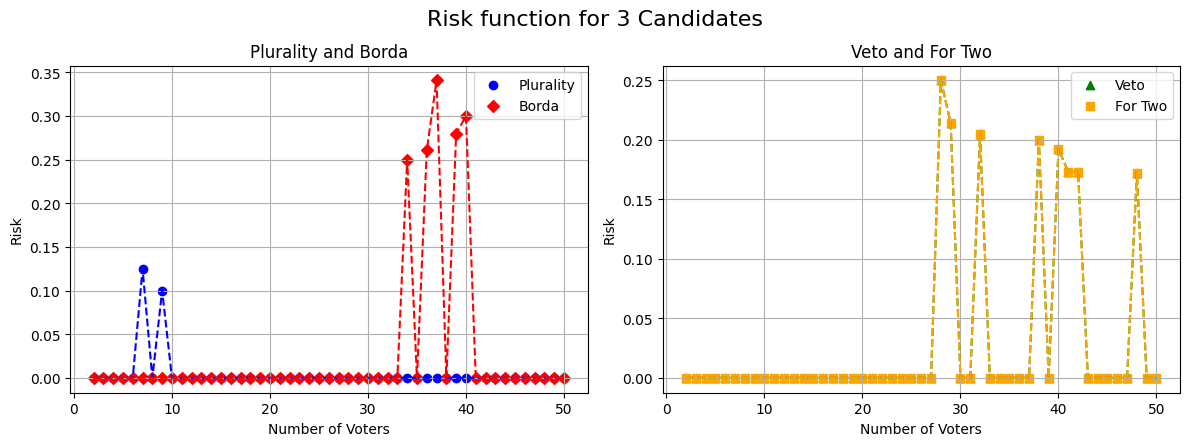

In [ ]:
risk_values_plurality,risk_values_fortwo,risk_values_veto,risk_values_borda = np.zeros(49),np.zeros(49),np.zeros(49),np.zeros(49)

voting = read_voting_(path_voting, table_name="three_candidates")
display(pd.DataFrame(voting))

for num_voters in range(2, 51):
    voting_situation = voting[:, :num_voters]
    risk_values_plurality[num_voters - 2] = compute_risk(voting_situation, plurality_outcome_op)
    risk_values_fortwo[num_voters - 2] = compute_risk(voting_situation, for_two_outcome_op)
    risk_values_veto[num_voters - 2] = compute_risk(voting_situation, veto_outcome_op)
    risk_values_borda[num_voters - 2] = compute_risk(voting_situation, borda_outcome_op)

# Plot the risk function for each voting scheme
plt.figure(figsize=(12, 8))
plt.suptitle(f'Risk function for 3 Candidates', fontsize=16)

plt.subplot(2, 2, 1)
plt.title('Plurality and Borda')
plt.xlabel('Number of Voters')
plt.ylabel('Risk')
plt.scatter(range(2, 51), risk_values_plurality, label='Plurality', marker='o', color='blue')
plt.plot(range(2, 51), risk_values_plurality, linestyle='--', color='blue')
plt.scatter(range(2, 51), risk_values_borda, label='Borda', marker='D', color='red')
plt.plot(range(2, 51), risk_values_borda, linestyle='--', color='red')
plt.legend()
plt.grid(True)

plt.subplot(2, 2, 2)
plt.title('Veto and For Two')
plt.xlabel('Number of Voters')
plt.ylabel('Risk')
plt.scatter(range(2, 51), risk_values_veto, label='Veto', marker='^', color='green')
plt.plot(range(2, 51), risk_values_veto, linestyle='--', color='green')
plt.scatter(range(2, 51), risk_values_fortwo, label='For Two', marker='s', color='orange')
plt.plot(range(2, 51), risk_values_fortwo, linestyle='--', color='orange')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


In [ ]:
%time compute_risk_combinations(voting6,plurality_outcome_op)

%time StrategicVoting(voting61,HappinessLevel(voting61,plurality_outcome(voting61),"PLURALITY").run(),plurality_outcome).run().all

pass


CPU times: user 297 ms, sys: 12.3 ms, total: 309 ms
Wall time: 303 ms
CPU times: user 1.78 s, sys: 2.78 ms, total: 1.78 s
Wall time: 1.81 s
